In [ ]:
#unzipping the uploaded archive

#capture is used to capture the output for the next line for a cleaner page
%%capture
!unzip rock
#!unzip latin

In [ ]:
#Defining the path to out datset

#data_path = '/content/latin/all_latin/asl_alphabet_train'
data_path = '/content/all'

In [ ]:
#Creating class_name list containing the name of the subfolders in the main one using the os library
import os
class_name = os.listdir(data_path)
print(class_name)
# Create a new text file named "class_names.txt"
with open("labels.txt", "w") as file:
  # Write each variable/element in class_name to a separate line
  for name in class_name:
    file.write(name + "\n")

['scissors', 'paper', 'rock']


In [ ]:
class_map=[]
for i in range(len(class_name)):
  class_map.append([i, class_name[i]])

class_map

[[0, 'scissors'], [1, 'paper'], [2, 'rock']]

In [ ]:
#Extracting data from the file

#glob is used to be able to group data easily ussing extension
import glob

#the subfolders containging the images are after the datapath/
imgs_path = data_path+"/"
file_names = glob.glob(imgs_path + "*")

data = []


for class_path in file_names:
    #the class name is the original file name
    #its saved in class_name then split from the rest because the rest will be used to find the image path
    class_name = class_path.split("/")[-1]

    #find any image ending with .jpg and apeend it with the current class name in the data
    for img_path in glob.glob(class_path + "/*.jpg"):
        data.append([img_path, class_name])

    for img_path in glob.glob(class_path + "/*.png"):
        data.append([img_path, class_name])

    for img_path in glob.glob(class_path + "/*.JPG"):
        data.append([img_path, class_name])

    for img_path in glob.glob(class_path + "/*.jpeg"):
        data.append([img_path, class_name])


In [ ]:
data[0]

['/content/all/scissors/H9H5HhYMY6vhEUJ4.png', 'scissors']

In [ ]:
from random import shuffle
#shuffles the data to make sure both the test data and train data have plenty of each class
shuffle(data)
#70% train 30% test
split=0.7
train_len = int(split*len(data))
train_set = data[0:train_len]
test_set = data[train_len:]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#function made to test if the data were split successfully
def plot_sample(x, index):
    plt.figure(figsize = (15,2))
    img=mpimg.imread(x[index][0])
    plt.xlabel(x[index][1])
    plt.imshow(img)

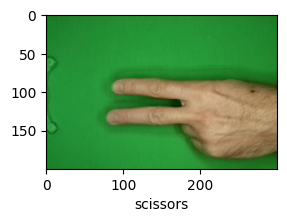

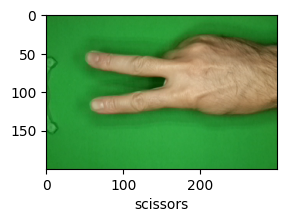

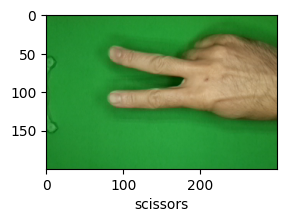

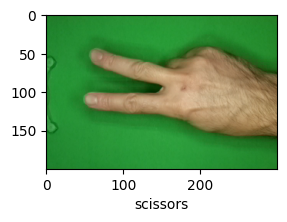

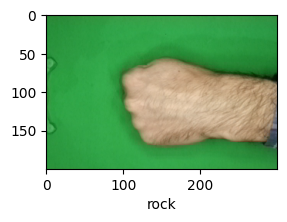

In [ ]:
for i in range(5):
  plot_sample(train_set,i)

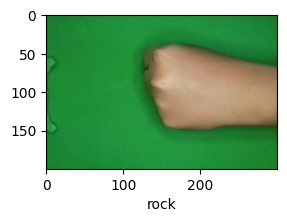

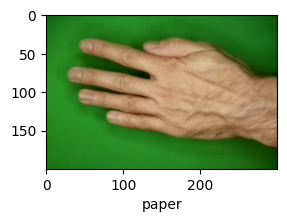

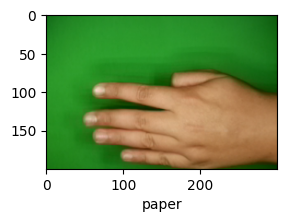

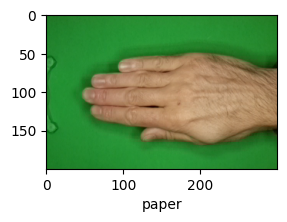

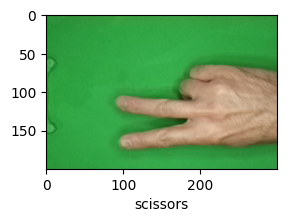

In [ ]:
for i in range(5):
  plot_sample(test_set,i)

In [ ]:
x_train=[]
y_train=[]
for i in range(train_len):
  x_train.append(train_set[i][0])
  y_train.append(train_set[i][1])

print(x_train[0])
print(y_train[0])

/content/all/scissors/tvxYEibqtUm3woXx.png
scissors


In [ ]:
x_test=[]
y_test=[]
for i in range(len(data)-train_len):
  x_test.append(test_set[i][0])
  y_test.append(test_set[i][1])

print(x_test[0])
print(y_test[0])

/content/all/rock/kVwUUOjOc6VtZVMt.png
rock


In [ ]:
#convert the strings in y to numbers using the class map
temp=[]
for i in range(len(y_train)):
  literalName=y_train[i]
  for j in range(len(class_map)):
    if(class_map[j][1]==literalName):
      temp.append(j)
y_train=temp
y_train[0]

0

In [ ]:
temp=[]
for i in range(len(y_test)):
  literalName=y_test[i]
  for j in range(len(class_map)):
    if(class_map[j][1]==literalName):
      temp.append(j)
y_test=temp
y_test[0]

2

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
#convert images to numpy arrays
temp=[]
for i in range(len(x_train)):
  pic=cv2.imread(x_train[i])
  pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
  pic=cv2.resize(pic,(32,32))
  temp.append(pic)
x_train=temp

In [ ]:
temp=[]
for i in range(len(x_test)):
  pic=cv2.imread(x_test[i])
  pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
  pic=cv2.resize(pic,(32,32))
  temp.append(pic)
x_test=temp

In [ ]:
#converts every list we made so far to numpy array to start creating models
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1531, 32, 32, 3)
(1531,)
(657, 32, 32, 3)
(657,)


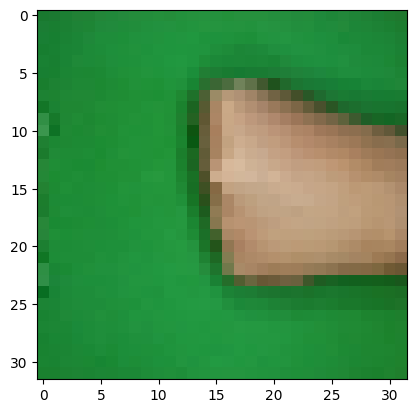

In [ ]:
plt.imshow(x_test[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
#Model 0 (used on day 7)
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
48/48 [==============================] - 4s 10ms/step - loss: 1.4750 - accuracy: 0.3553
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 1.0215 - accuracy: 0.5153
Epoch 3/20
48/48 [==============================] - 0s 5ms/step - loss: 0.9342 - accuracy: 0.5630
Epoch 4/20
48/48 [==============================] - 0s 4ms/step - loss: 0.7818 - accuracy: 0.6884
Epoch 5/20
48/48 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.7185
Epoch 6/20
48/48 [==============================] - 0s 10ms/step - loss: 0.5954 - accuracy: 0.7831
Epoch 7/20
48/48 [==============================] - 0s 4ms/step - loss: 0.5451 - accuracy: 0.7949
Epoch 8/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.8125
Epoch 9/20
48/48 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.8367
Epoch 10/20
48/48 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.8334
Epoch 11/20
48/48

In [ ]:
cnn.evaluate(x_test,y_test)

21/21 [==============================] - 0s 7ms/step - loss: 0.2256 - accuracy: 0.9269


[0.22562363743782043, 0.9269406199455261]

In [ ]:
# Create Adam Optimizer

from tensorflow.keras.optimizers import Adam

opt_1 = Adam(learning_rate=0.001)

In [ ]:
# Base Model (Model 1)

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model_1 = Sequential([layers.Input((32, 32,3)),
                      layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                      layers.MaxPooling2D((2, 2)),
                     layers.Flatten(),
                     layers.Dense(10, activation='softmax')])

model_1.compile(optimizer=opt_1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model_1.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
48/48 [==============================] - 1s 8ms/step - loss: 0.9237 - accuracy: 0.6094 - val_loss: 0.6931 - val_accuracy: 0.7763
Epoch 2/10
48/48 [==============================] - 0s 4ms/step - loss: 0.5521 - accuracy: 0.8152 - val_loss: 0.5304 - val_accuracy: 0.8280
Epoch 3/10
48/48 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.8628 - val_loss: 0.5480 - val_accuracy: 0.8128
Epoch 4/10
48/48 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.8857 - val_loss: 0.4118 - val_accuracy: 0.8767
Epoch 5/10
48/48 [==============================] - 0s 4ms/step - loss: 0.3351 - accuracy: 0.8981 - val_loss: 0.3672 - val_accuracy: 0.8798
Epoch 6/10
48/48 [==============================] - 0s 5ms/step - loss: 0.2785 - accuracy: 0.9144 - val_loss: 0.3301 - val_accuracy: 0.8935
Epoch 7/10
48/48 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.9223 - val_loss: 0.3165 - val_accuracy: 0.9011
Epoch 8/10
48/48 [==

In [ ]:
# Model 2

opt_2 = Adam(learning_rate=0.001)

model_2 = Sequential([layers.Input((32, 32,3)),
                     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                     layers.MaxPooling2D((2, 2)),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_2.compile(optimizer=opt_2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
48/48 [==============================] - 2s 8ms/step - loss: 0.9857 - accuracy: 0.5604 - val_loss: 0.6893 - val_accuracy: 0.7717
Epoch 2/10
48/48 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.8537 - val_loss: 0.4380 - val_accuracy: 0.8554
Epoch 3/10
48/48 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.8961 - val_loss: 0.3278 - val_accuracy: 0.8965
Epoch 4/10
48/48 [==============================] - 0s 5ms/step - loss: 0.2097 - accuracy: 0.9301 - val_loss: 0.2252 - val_accuracy: 0.9269
Epoch 5/10
48/48 [==============================] - 0s 5ms/step - loss: 0.1270 - accuracy: 0.9641 - val_loss: 0.2154 - val_accuracy: 0.9330
Epoch 6/10
48/48 [==============================] - 0s 5ms/step - loss: 0.1111 - accuracy: 0.9634 - val_loss: 0.2017 - val_accuracy: 0.9224
Epoch 7/10
48/48 [==============================] - 0s 5ms/step - loss: 0.0699 - accuracy: 0.9771 - val_loss: 0.1466 - val_accuracy: 0.9528
Epoch 8/10
48/48 [==

In [ ]:
# Final Model

opt_3 = Adam(learning_rate=0.001)

model_3 = Sequential([layers.Input((32, 32,3)),
                     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                     layers.MaxPooling2D((2, 2)),
                     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                     layers.MaxPooling2D((2, 2)),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
48/48 [==============================] - 2s 9ms/step - loss: 1.1334 - accuracy: 0.4598 - val_loss: 0.9446 - val_accuracy: 0.5510
Epoch 2/10
48/48 [==============================] - 0s 5ms/step - loss: 0.5602 - accuracy: 0.7929 - val_loss: 0.4026 - val_accuracy: 0.8706
Epoch 3/10
48/48 [==============================] - 0s 5ms/step - loss: 0.3133 - accuracy: 0.8922 - val_loss: 0.2797 - val_accuracy: 0.8950
Epoch 4/10
48/48 [==============================] - 0s 5ms/step - loss: 0.1866 - accuracy: 0.9366 - val_loss: 0.1932 - val_accuracy: 0.9346
Epoch 5/10
48/48 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.9589 - val_loss: 0.1472 - val_accuracy: 0.9482
Epoch 6/10
48/48 [==============================] - 0s 5ms/step - loss: 0.0834 - accuracy: 0.9726 - val_loss: 0.1399 - val_accuracy: 0.9513
Epoch 7/10
48/48 [==============================] - 0s 5ms/step - loss: 0.0732 - accuracy: 0.9713 - val_loss: 0.1258 - val_accuracy: 0.9604
Epoch 8/10
48/48 [==

In [ ]:
!pip install tensorflow tflite_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model_3)
tflite_model = converter.convert()

with open("converted_model.tflite", "wb") as f:
  f.write(tflite_model)